In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



## Project Title and Introduction

### Project Title: [Predict Calorie Expenditure](https://www.kaggle.com/competitions/playground-series-s5e5)
- Playground Series - Season 5, Episode 5
- Our goal is to predict how many calories were burned during a workout.



## Import Libraries and Load Data

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the Dataset

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("submission.csv")

## Exploratory Data Analysis (EDA)

### Dataset Overview

In [4]:
train_df.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [5]:
train_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [6]:
## for train_df
print(f"Shape of Dataset(train_df): {train_df.shape}")

print()

print(f"Top 5 rows in dataset:")
train_df.head()

Shape of Dataset(train_df): (750000, 9)

Top 5 rows in dataset:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [7]:
train_df.describe()

id            Age         Height         Weight  \
count  750000.000000  750000.000000  750000.000000  750000.000000   
mean   374999.500000      41.420404     174.697685      75.145668   
std    216506.495284      15.175049      12.824496      13.982704   
min         0.000000      20.000000     126.000000      36.000000   
25%    187499.750000      28.000000     164.000000      63.000000   
50%    374999.500000      40.000000     174.000000      74.000000   
75%    562499.250000      52.000000     185.000000      87.000000   
max    749999.000000      79.000000     222.000000     132.000000   

            Duration     Heart_Rate      Body_Temp       Calories  
count  750000.000000  750000.000000  750000.000000  750000.000000  
mean       15.421015      95.483995      40.036253      88.282781  
std         8.354095       9.449845       0.779875      62.395349  
min         1.000000      67.000000      37.100000       1.000000  
25%         8.000000      88.000000      39.600000      34.000000  
50%        15.000000      95.000000      40.300000      77.000000  
75%        23.000000     103.000000      40.700000     136.000000  
max        30.000000     128.000000      41.500000     314.000000

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [9]:
## check how many null values are there
train_df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### Observation:
- There is no any null values in train_df

In [10]:
## for test_df
print(f"Shape of Dataset(test_df): {test_df.shape}")

print()

print(f"Top 5 rows in dataset:")
test_df.head()

Shape of Dataset(test_df): (250000, 8)

Top 5 rows in dataset:


id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5

In [11]:
## check how many null values are there
test_df.isnull().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

#### Observation:
- *Calories* is out target feature.
- There is no any null value in test_df 

In [12]:
## sample_submission
sample_submission

id    Calories
0       750000   27.266423
1       750001  108.745735
2       750002   87.414818
3       750003  125.937498
4       750004   76.167972
...        ...         ...
249995  999995   25.990971
249996  999996    9.545033
249997  999997   73.410063
249998  999998  169.565001
249999  999999   76.677275

[250000 rows x 2 columns]

In [13]:
train_df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [14]:
## function to plot some graphs and print the dtype of feature
def show_details_and_graphs(df,df_col):
    col_dtype=df[df_col].dtype
    print("Feature:",df_col)
    print("Data type:",col_dtype)
    print("Total missing/null values:",df[df_col].isnull().sum())

    print()
    if(col_dtype=='O'):
        print("Total Unique Values:",df[df_col].nunique())
        plt.figure(figsize=(15,6))

        plt.subplot(1,2,1)
        plt.title("Bar Plot for {}".format(df_col))
        plt.ylabel("Count")
        df[df_col].value_counts().plot(kind='bar')

        plt.subplot(1,2,2)
        plt.title("Pie Chart for {}".format(df_col))
        df[df_col].value_counts().plot(kind='pie', autopct='%.2f%%')
        plt.show()


    elif(col_dtype!='O'):
        print("Mean:",np.round(df[df_col].mean(),2))
        print("Median:",np.round(df[df_col].median(),2))
        print("Minimum:",df[df_col].min())
        print("Maximum:",df[df_col].max())
        print("Std:",np.round(df[df_col].std(),2))
        print("Skew:",df[df_col].skew())
        
        plt.figure(figsize=(18,15))

        plt.subplot(2,2,1)
        plt.title("Histogram for '{}'".format(df_col))
        df[df_col].plot(kind='hist')

        plt.subplot(2,2,2)
        plt.title("KDE plot for '{}'".format(df_col))
        df[df_col].plot(kind='kde')

        plt.subplot(2,2,3)
        plt.title("Box Plot for '{}'".format(df_col))
        df[df_col].plot(kind='box')

        plt.subplot(2,2,4)
        plt.title("Distplot for '{}'".format(df_col))
        sns.distplot(df[df_col])

        plt.show()


    else:
        print("Datatype of feature is neither numeric not categorical...")

In [15]:
## function to find and print all the rows where outlier is present
def check_outlier(df,df_col):
    if df[df_col].dtype!='O':
        print("Feature Name : {}".format(df_col))
        df_col_mean = df[df_col].mean()
        df_col_std = df[df_col].std()

        df_col_lower_limit = df_col_mean - 3*df_col_std 
        df_col_upper_limit = df_col_mean + 3*df_col_std 

        print("Based on Z-Score test :")
        print()
        return df[(df[df_col]<df_col_lower_limit) | (df[df_col]>df_col_upper_limit)]
    else:
        print("This is a categorical Feature...")

### Univariate Analysis

#### id -->

In [16]:
train_df['id']

0              0
1              1
2              2
3              3
4              4
           ...  
749995    749995
749996    749996
749997    749997
749998    749998
749999    749999
Name: id, Length: 750000, dtype: int64

In [17]:
train_df['id'].describe()

count    750000.000000
mean     374999.500000
std      216506.495284
min           0.000000
25%      187499.750000
50%      374999.500000
75%      562499.250000
max      749999.000000
Name: id, dtype: float64

Feature: id
Data type: int64
Total missing/null values: 0

Mean: 374999.5
Median: 374999.5
Minimum: 0
Maximum: 749999
Std: 216506.5
Skew: -1.963100174775205e-15


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


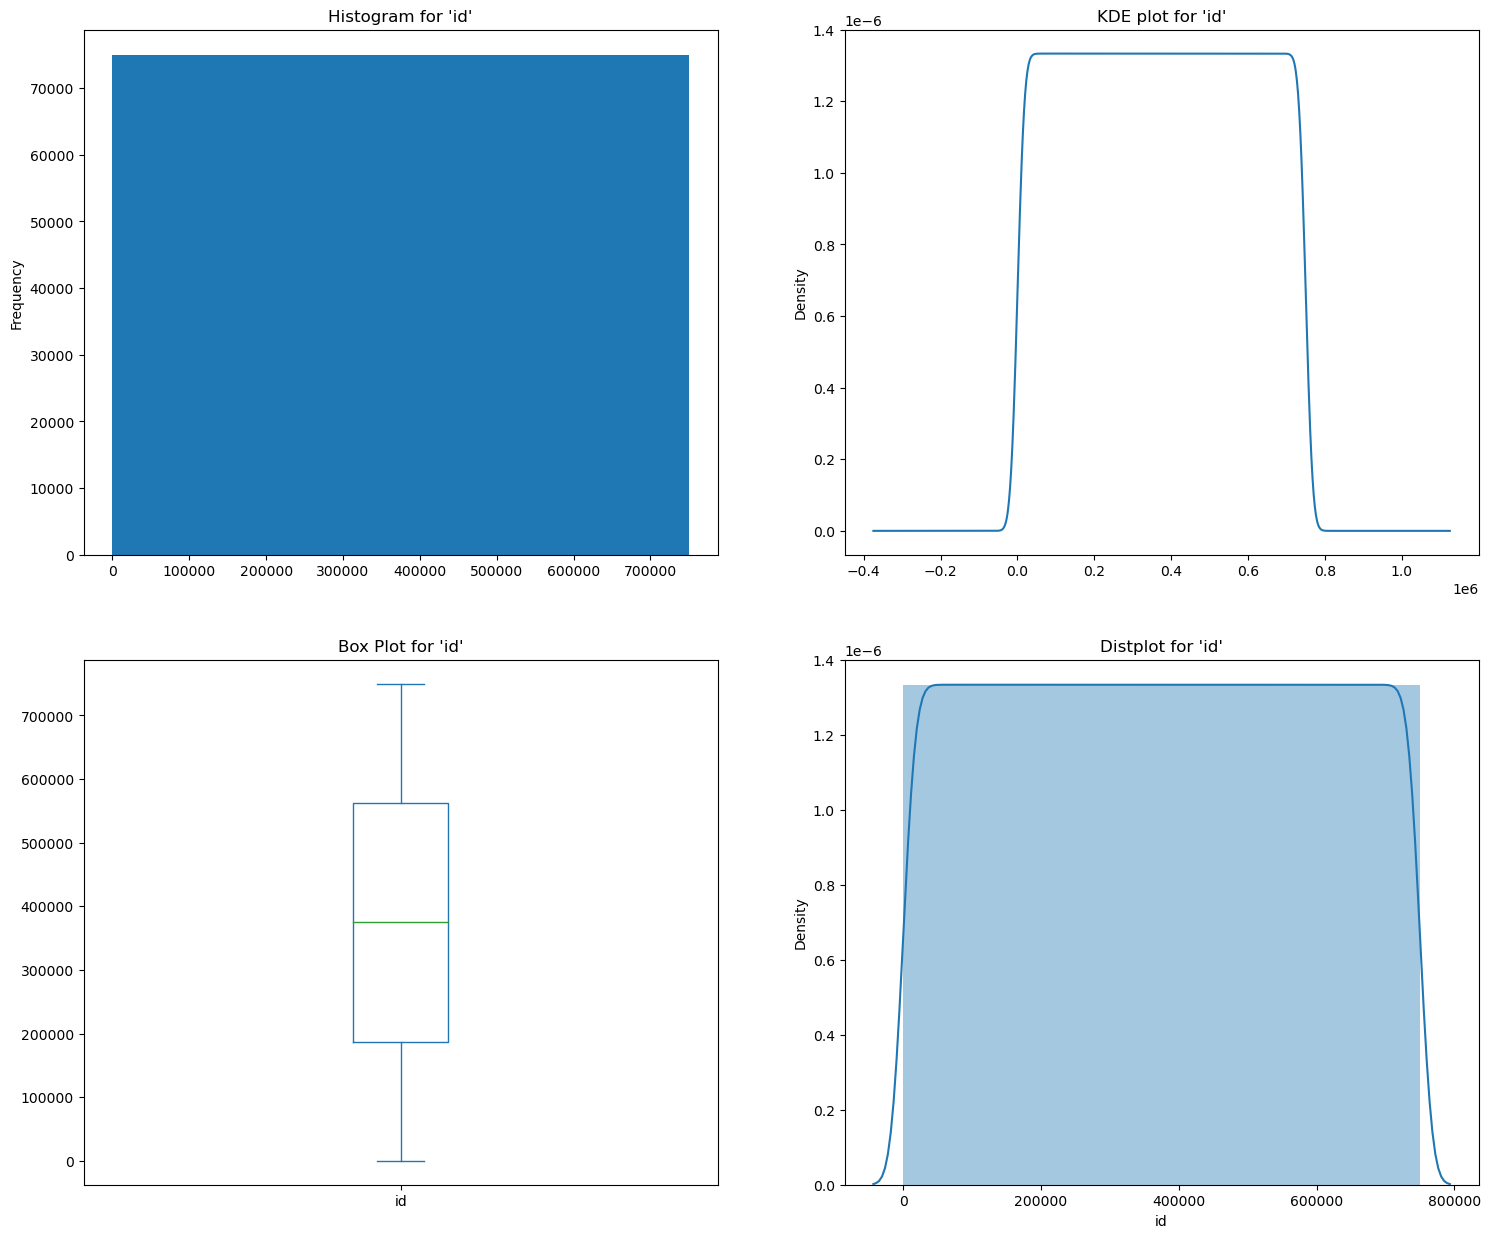

In [18]:
show_details_and_graphs(train_df,'id')

#### Observation:
- ***id*** feature is not playing any role related to that what will be ***Calories***, id feature is not useful to predict the calories.
- So we can drop this feature.

#### Sex -->

In [19]:
train_df['Sex']

0           male
1         female
2         female
3           male
4         female
           ...  
749995      male
749996    female
749997      male
749998      male
749999    female
Name: Sex, Length: 750000, dtype: object

In [20]:
train_df['Sex'].describe()

count     750000
unique         2
top       female
freq      375721
Name: Sex, dtype: object

In [21]:
train_df['Sex'].value_counts()

female    375721
male      374279
Name: Sex, dtype: int64

Feature: Sex
Data type: object
Total missing/null values: 0

Total Unique Values: 2


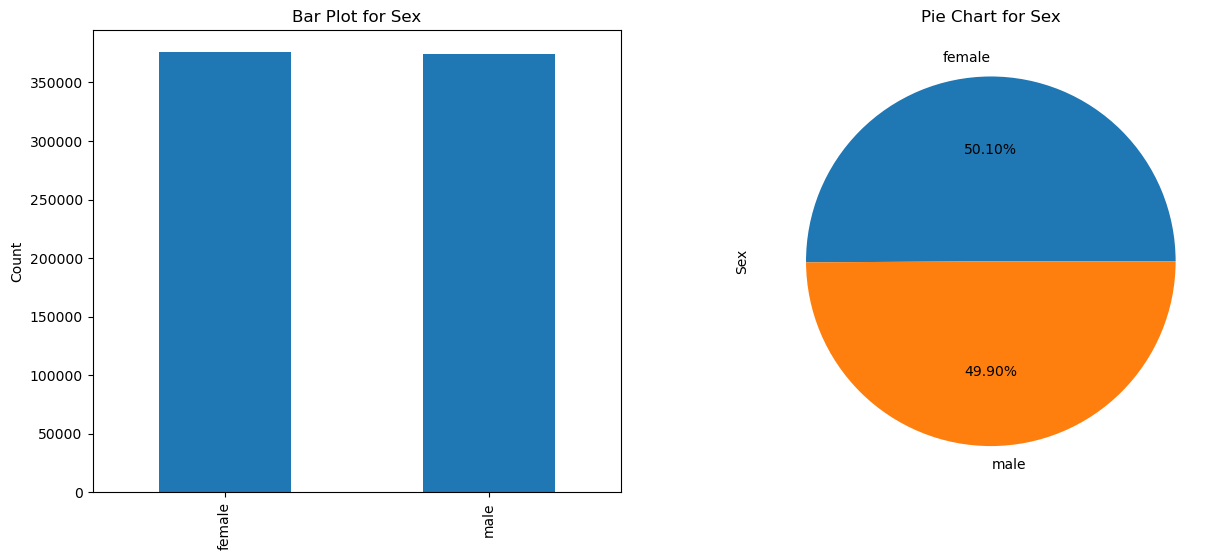

In [22]:
show_details_and_graphs(train_df,'Sex')

#### Observation:
- In ***Sex*** feature no. of male and female are equally distributed.

#### Age -->

In [23]:
train_df['Age']

0         36
1         64
2         51
3         20
4         38
          ..
749995    28
749996    64
749997    60
749998    45
749999    39
Name: Age, Length: 750000, dtype: int64

In [24]:
train_df['Age'].describe()

count    750000.000000
mean         41.420404
std          15.175049
min          20.000000
25%          28.000000
50%          40.000000
75%          52.000000
max          79.000000
Name: Age, dtype: float64

Feature: Age
Data type: int64
Total missing/null values: 0

Mean: 41.42
Median: 40.0
Minimum: 20
Maximum: 79
Std: 15.18
Skew: 0.43639747566132264


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


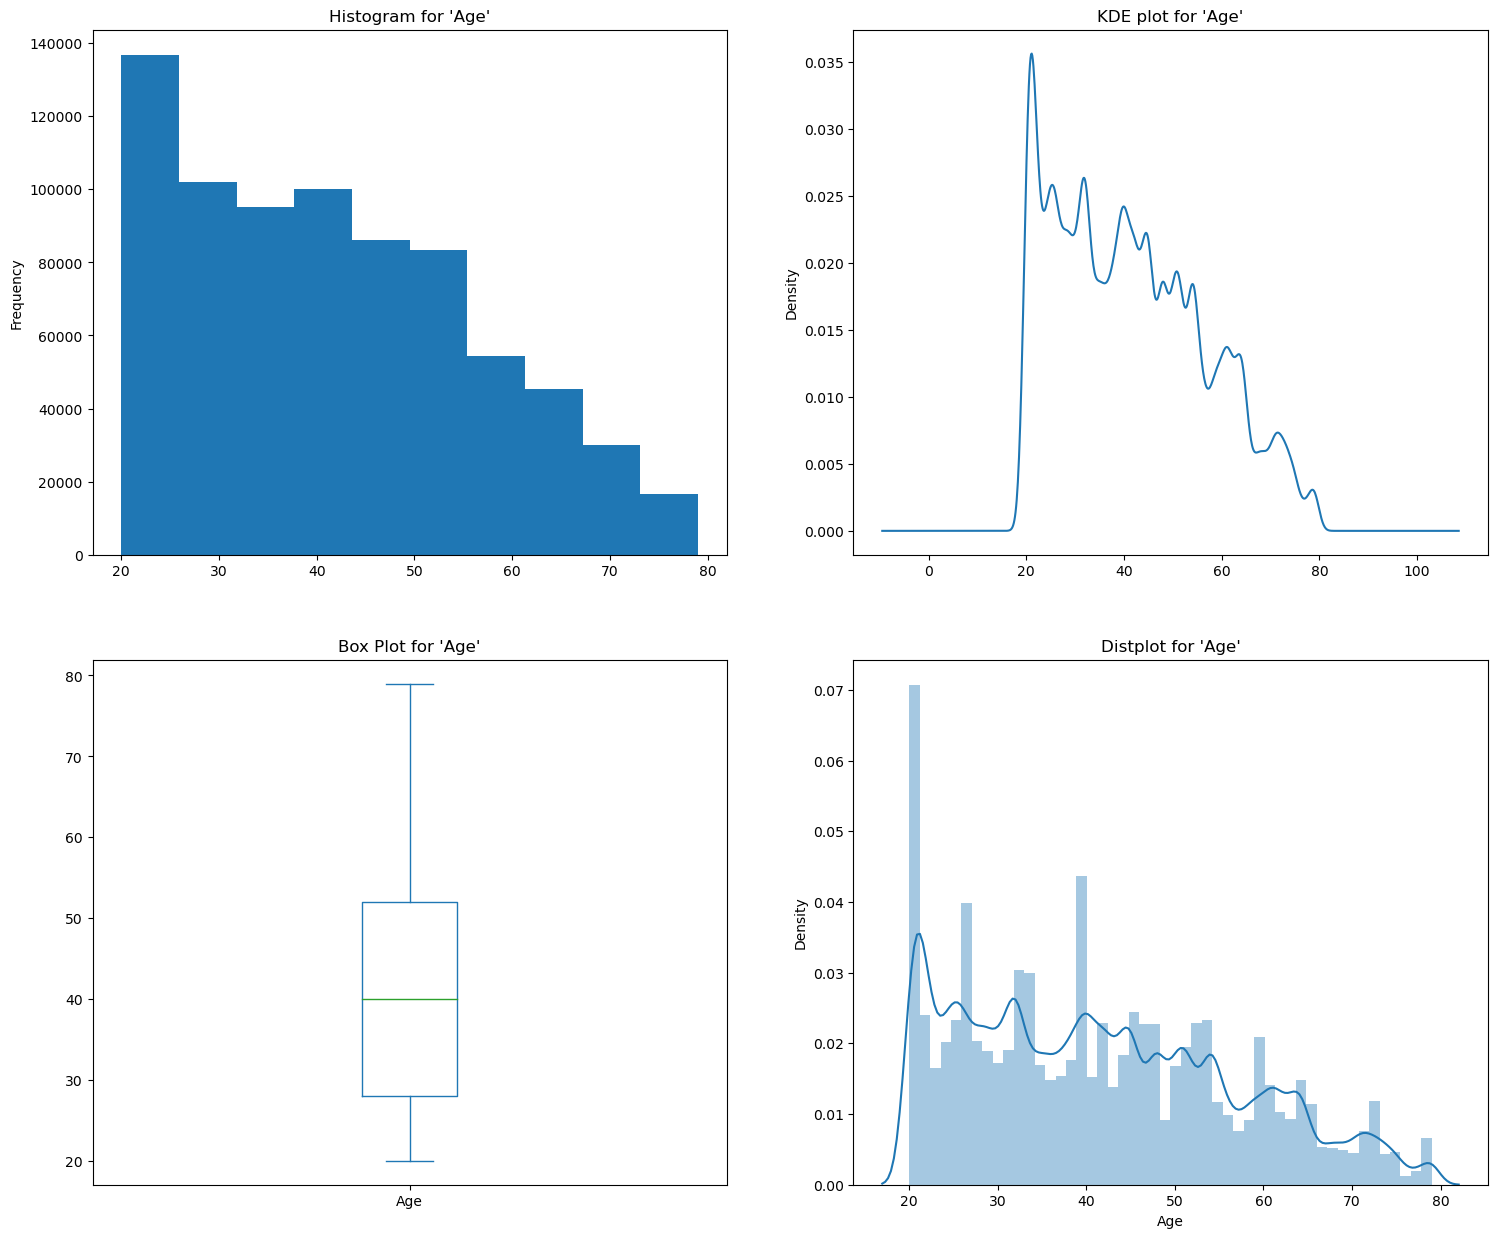

In [25]:
show_details_and_graphs(train_df,'Age')

In [26]:
check_outlier(train_df,'Age')

Feature Name : Age
Based on Z-Score test :



Empty DataFrame
Columns: [id, Sex, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories]
Index: []

#### Observation:
- There is no any null values and also no any outlier.
- Distribution of 'Age' feature is skewed(right/positive)

In [27]:
train_df.head(4)

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0

#### Height -->

In [28]:
train_df['Height']

0         189.0
1         163.0
2         161.0
3         192.0
4         166.0
          ...  
749995    193.0
749996    165.0
749997    162.0
749998    182.0
749999    171.0
Name: Height, Length: 750000, dtype: float64

In [29]:
train_df['Height'].describe()

count    750000.000000
mean        174.697685
std          12.824496
min         126.000000
25%         164.000000
50%         174.000000
75%         185.000000
max         222.000000
Name: Height, dtype: float64

Feature: Height
Data type: float64
Total missing/null values: 0

Mean: 174.7
Median: 174.0
Minimum: 126.0
Maximum: 222.0
Std: 12.82
Skew: 0.05177712374068403


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


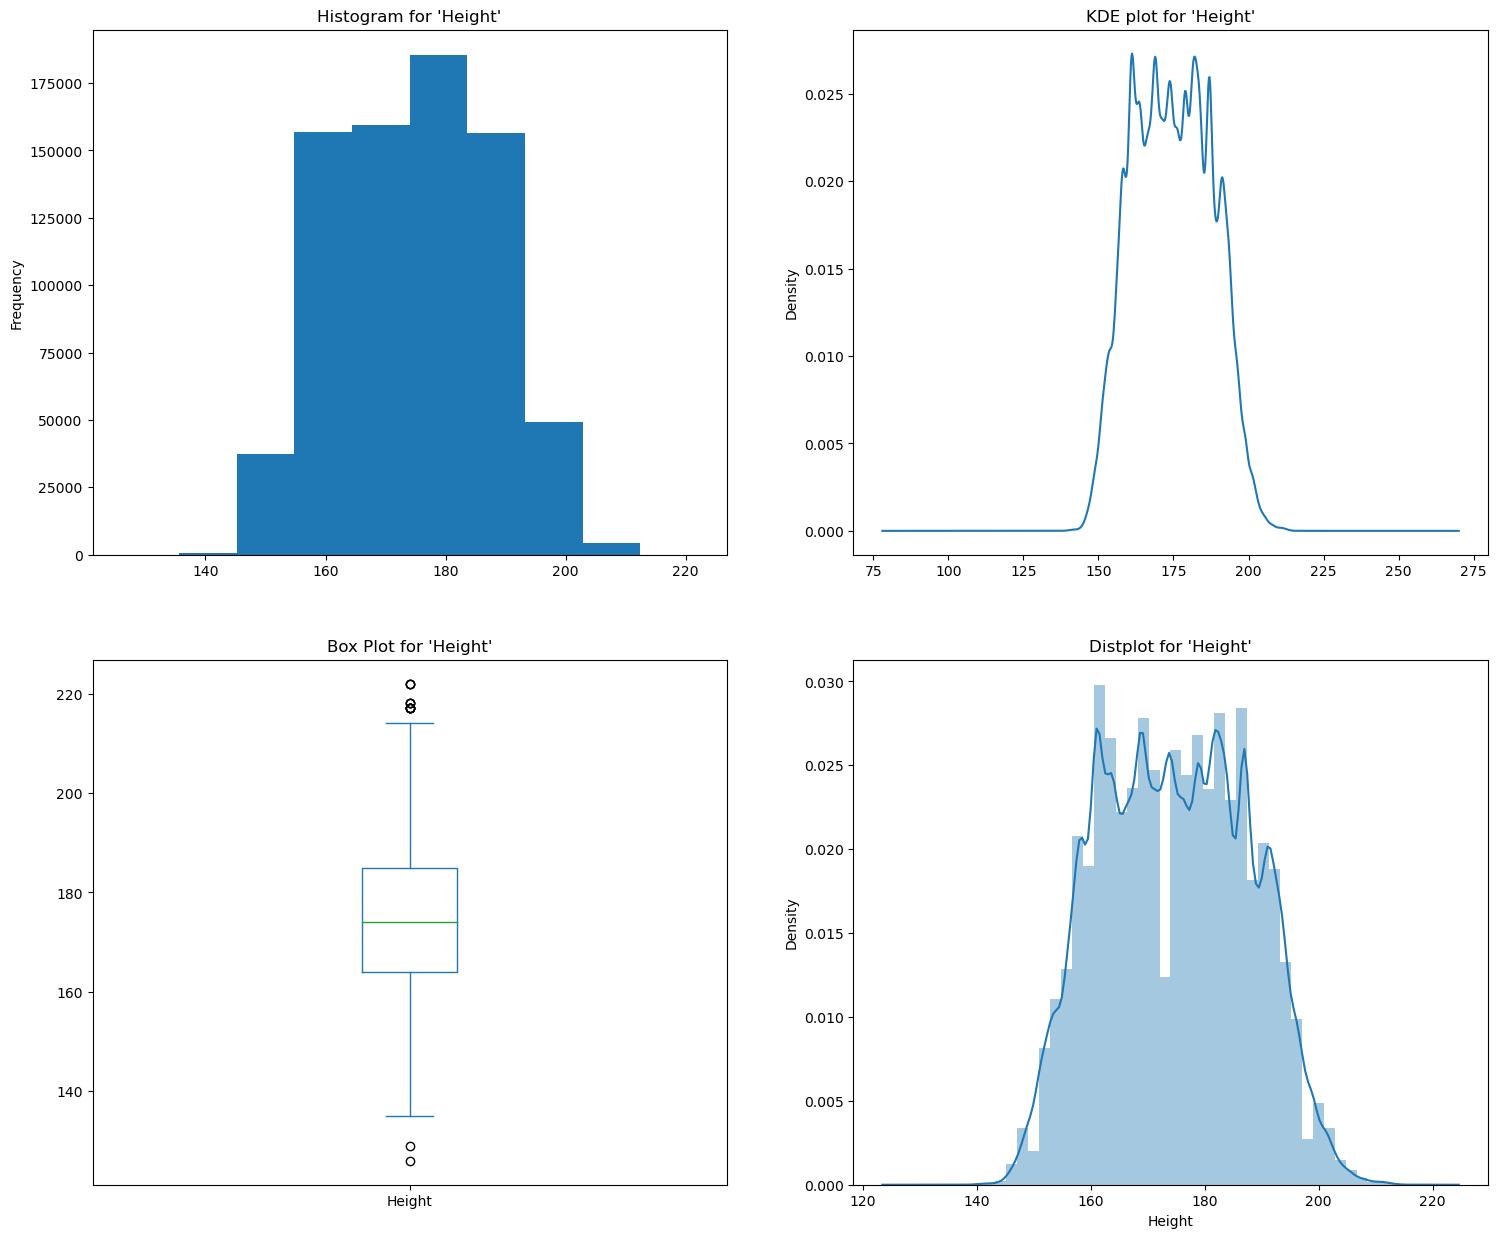

In [30]:
show_details_and_graphs(train_df,'Height')

In [31]:
check_outlier(train_df,'Height')

Feature Name : Height
Based on Z-Score test :



id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
16231    16231    male   40   217.0   118.0      28.0       120.0       40.9   
28136    28136    male   41   217.0   132.0      27.0       113.0       41.0   
43623    43623    male   32   214.0   112.0       5.0        77.0       39.0   
52405    52405    male   47   222.0   128.0      29.0       109.0       41.3   
69448    69448    male   71   214.0   112.0      27.0       112.0       40.9   
83341    83341    male   42   214.0   113.0      22.0       102.0       40.8   
84554    84554    male   45   222.0   128.0       8.0        99.0       40.5   
127646  127646  female   20   136.0    45.0       1.0        90.0       37.8   
128471  128471    male   41   214.0   113.0      26.0       108.0       40.8   
157816  157816    male   35   217.0    77.0      29.0       115.0       40.9   
157921  157921    male   47   214.0   111.0      26.0       111.0       40.7   
165473  165473    male   45   214.0   114.0       4.0        79.0       38.9   
201837  201837  female   57   136.0    50.0      26.0       114.0       40.9   
222696  222696  female   41   129.0    41.0      26.0       102.0       40.9   
224520  224520    male   38   218.0    68.0      27.0       117.0       41.0   
229352  229352    male   40   214.0   113.0      22.0        97.0       40.9   
286079  286079    male   60   217.0   118.0      27.0       110.0       41.1   
374815  374815    male   35   218.0   126.0      30.0       105.0       40.7   
402608  402608    male   26   217.0   118.0       5.0        88.0       39.1   
404229  404229    male   40   214.0   112.0      30.0       105.0       41.0   
414852  414852    male   59   214.0   114.0      25.0       104.0       40.7   
421243  421243    male   40   214.0   113.0      27.0       108.0       40.9   
426190  426190  female   30   222.0    70.0      20.0       105.0       40.3   
439957  439957    male   47   218.0   132.0      18.0        94.0       40.7   
458172  458172    male   50   214.0   113.0      19.0       102.0       40.7   
472232  472232    male   31   214.0   101.0      28.0       102.0       40.8   
505094  505094    male   51   217.0   118.0       6.0        78.0       39.1   
523892  523892  female   26   135.0    69.0       1.0        84.0       37.7   
532743  532743    male   51   214.0   111.0      20.0        98.0       40.7   
557566  557566    male   49   214.0   105.0      28.0       114.0       41.1   
568120  568120    male   51   214.0   112.0       6.0        92.0       39.1   
614855  614855    male   59   214.0   118.0      28.0       112.0       40.7   
636603  636603    male   42   214.0   113.0      21.0       103.0       40.7   
667624  667624    male   56   214.0   114.0      17.0       102.0       40.7   
698729  698729    male   64   214.0   113.0      24.0       107.0       40.9   
712091  712091  female   44   126.0    52.0       9.0        94.0       39.9   
721512  721512    male   32   214.0   105.0      30.0       107.0       41.2   
746823  746823  female   20   135.0    51.0      14.0        94.0       40.1   

        Calories  
16231      240.0  
28136      218.0  
43623        9.0  
52405      227.0  
69448      264.0  
83341      147.0  
84554       55.0  
127646       5.0  
128471     197.0  
157816     218.0  
157921     216.0  
165473      13.0  
201837     196.0  
222696     164.0  
224520     218.0  
229352     128.0  
286079     232.0  
374815     218.0  
402608      20.0  
404229     209.0  
414852     200.0  
421243     205.0  
426190     121.0  
439957     105.0  
458172     132.0  
472232     165.0  
505094      22.0  
523892       4.0  
532743     134.0  
557566     261.0  
568120      28.0  
614855     252.0  
636603     146.0  
667624     126.0  
698729     207.0  
712091      47.0  
721512     196.0  
746823      67.0

In [32]:
check_outlier(train_df,'Height').shape

Feature Name : Height
Based on Z-Score test :



(38, 9)

#### Observation:
- There are total 38 rows which contains outliers according to Z Score method.
- Distribution is likely Normal not proper.

#### Weight -->

In [33]:
train_df['Weight']

0         82.0
1         60.0
2         64.0
3         90.0
4         61.0
          ... 
749995    97.0
749996    63.0
749997    67.0
749998    91.0
749999    65.0
Name: Weight, Length: 750000, dtype: float64

In [34]:
train_df['Weight'].describe()

count    750000.000000
mean         75.145668
std          13.982704
min          36.000000
25%          63.000000
50%          74.000000
75%          87.000000
max         132.000000
Name: Weight, dtype: float64

Feature: Weight
Data type: float64
Total missing/null values: 0

Mean: 75.15
Median: 74.0
Minimum: 36.0
Maximum: 132.0
Std: 13.98
Skew: 0.211193864122948


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


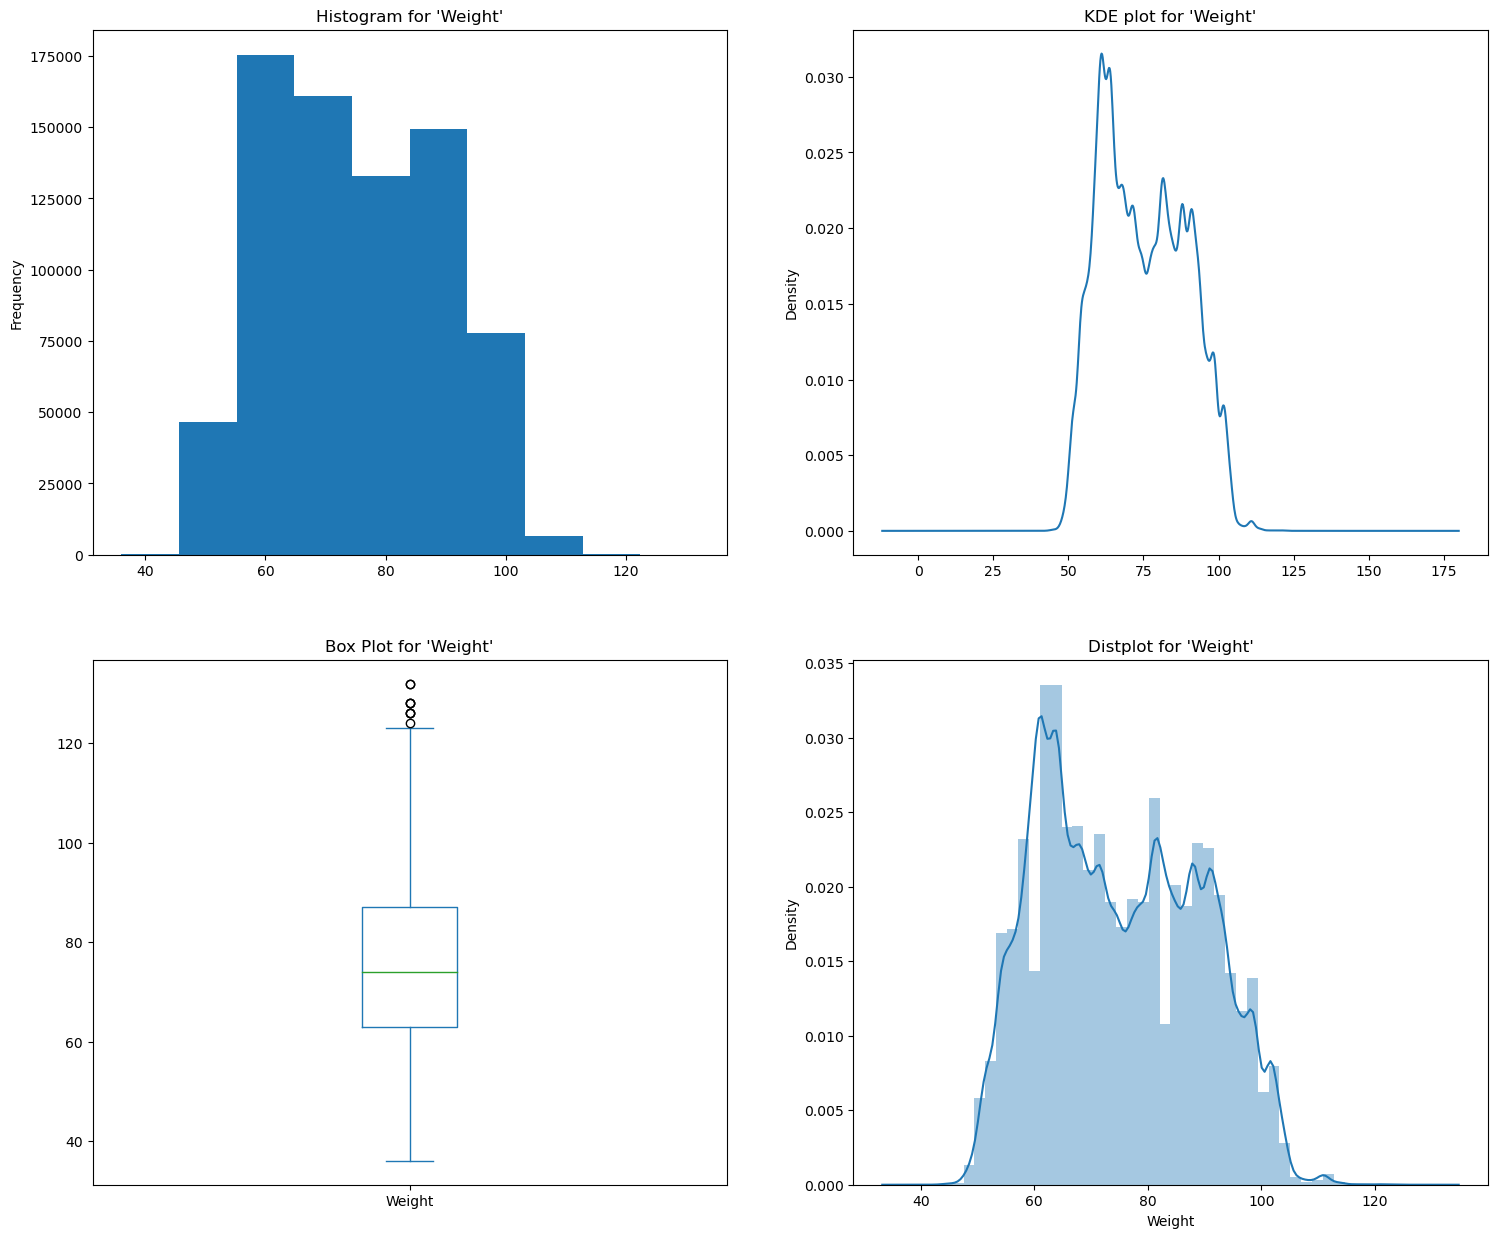

In [35]:
show_details_and_graphs(train_df,'Weight')

In [36]:
check_outlier(train_df,'Weight')

Feature Name : Weight
Based on Z-Score test :



id   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
10026    10026  male   72   204.0   121.0      28.0       109.0       40.6   
16231    16231  male   40   217.0   118.0      28.0       120.0       40.9   
22787    22787  male   41   212.0   123.0      27.0       110.0       40.8   
28136    28136  male   41   217.0   132.0      27.0       113.0       41.0   
34813    34813  male   79   212.0   118.0      26.0       101.0       40.7   
...        ...   ...  ...     ...     ...       ...         ...        ...   
721807  721807  male   72   208.0   121.0       3.0        76.0       38.0   
729320  729320  male   60   196.0   119.0       9.0        88.0       39.8   
732271  732271  male   54   212.0   121.0      25.0       111.0       40.9   
742136  742136  male   63   210.0   119.0      29.0       113.0       41.2   
742690  742690  male   45   207.0   121.0      25.0       116.0       40.8   

        Calories  
10026      261.0  
16231      240.0  
22787      218.0  
28136      218.0  
34813      214.0  
...          ...  
721807      15.0  
729320      41.0  
732271     214.0  
742136     250.0  
742690     230.0  

[104 rows x 9 columns]

#### Observation:
- There are 104 rows which contains outliers respect to 'Weight' column.
- Distribution is not like normal little right skewed.

#### Duration -->

In [37]:
train_df['Duration']

0         26.0
1          8.0
2          7.0
3         25.0
4         25.0
          ... 
749995    30.0
749996    18.0
749997    29.0
749998    17.0
749999    19.0
Name: Duration, Length: 750000, dtype: float64

In [38]:
train_df['Duration'].describe()

count    750000.000000
mean         15.421015
std           8.354095
min           1.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          30.000000
Name: Duration, dtype: float64

In [39]:
check_outlier(train_df,'Duration')

Feature Name : Duration
Based on Z-Score test :



Empty DataFrame
Columns: [id, Sex, Age, Height, Weight, Duration, Heart_Rate, Body_Temp, Calories]
Index: []

Feature: Duration
Data type: float64
Total missing/null values: 0

Mean: 15.42
Median: 15.0
Minimum: 1.0
Maximum: 30.0
Std: 8.35
Skew: 0.02625895058219597


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


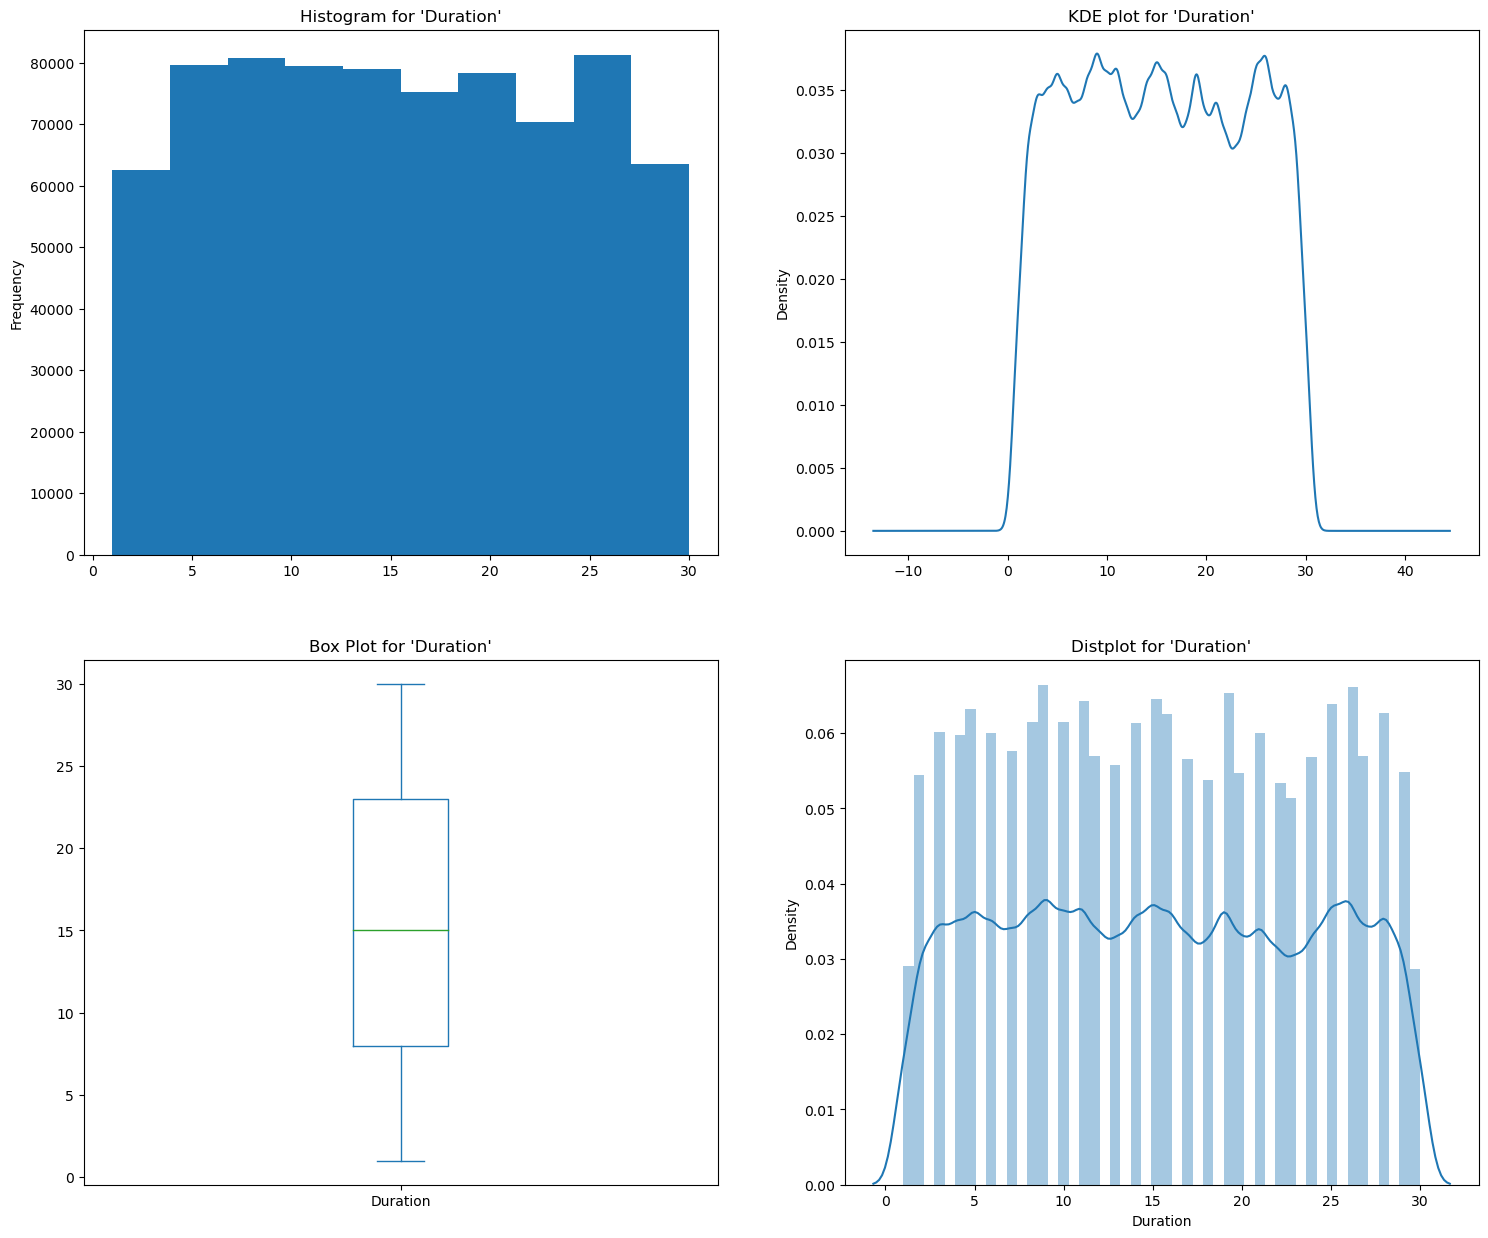

In [40]:
show_details_and_graphs(train_df,'Duration')

#### Observation:
- There is no any null values as well no any outlier.

#### Heart_Rate -->

In [41]:
train_df['Heart_Rate']

0         101.0
1          85.0
2          84.0
3         105.0
4         102.0
          ...  
749995    114.0
749996     92.0
749997    113.0
749998    102.0
749999     97.0
Name: Heart_Rate, Length: 750000, dtype: float64

In [42]:
train_df['Heart_Rate'].describe()

count    750000.000000
mean         95.483995
std           9.449845
min          67.000000
25%          88.000000
50%          95.000000
75%         103.000000
max         128.000000
Name: Heart_Rate, dtype: float64

In [43]:
check_outlier(train_df,'Heart_Rate')

Feature Name : Heart_Rate
Based on Z-Score test :



id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
12413    12413    male   64   192.0    90.0       2.0        67.0       38.6   
12859    12859  female   46   175.0    69.0       1.0        67.0       37.9   
14209    14209    male   64   185.0    90.0      29.0       127.0       40.9   
18125    18125  female   38   156.0    60.0       3.0        67.0       39.0   
19657    19657    male   21   200.0    98.0      20.0       125.0       40.7   
...        ...     ...  ...     ...     ...       ...         ...        ...   
705517  705517  female   32   149.0    53.0       1.0        67.0       38.0   
713143  713143    male   32   179.0    76.0      28.0       127.0       40.6   
733161  733161    male   25   196.0    95.0      29.0       125.0       40.7   
741936  741936  female   52   169.0    67.0       4.0        67.0       38.6   
746710  746710  female   70   161.0    54.0       1.0        67.0       37.7   

        Calories  
12413        5.0  
12859        2.0  
14209      295.0  
18125        8.0  
19657      131.0  
...          ...  
705517       2.0  
713143     214.0  
733161     237.0  
741936      12.0  
746710       3.0  

[175 rows x 9 columns]

Feature: Heart_Rate
Data type: float64
Total missing/null values: 0

Mean: 95.48
Median: 95.0
Minimum: 67.0
Maximum: 128.0
Std: 9.45
Skew: -0.005668158300634192


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


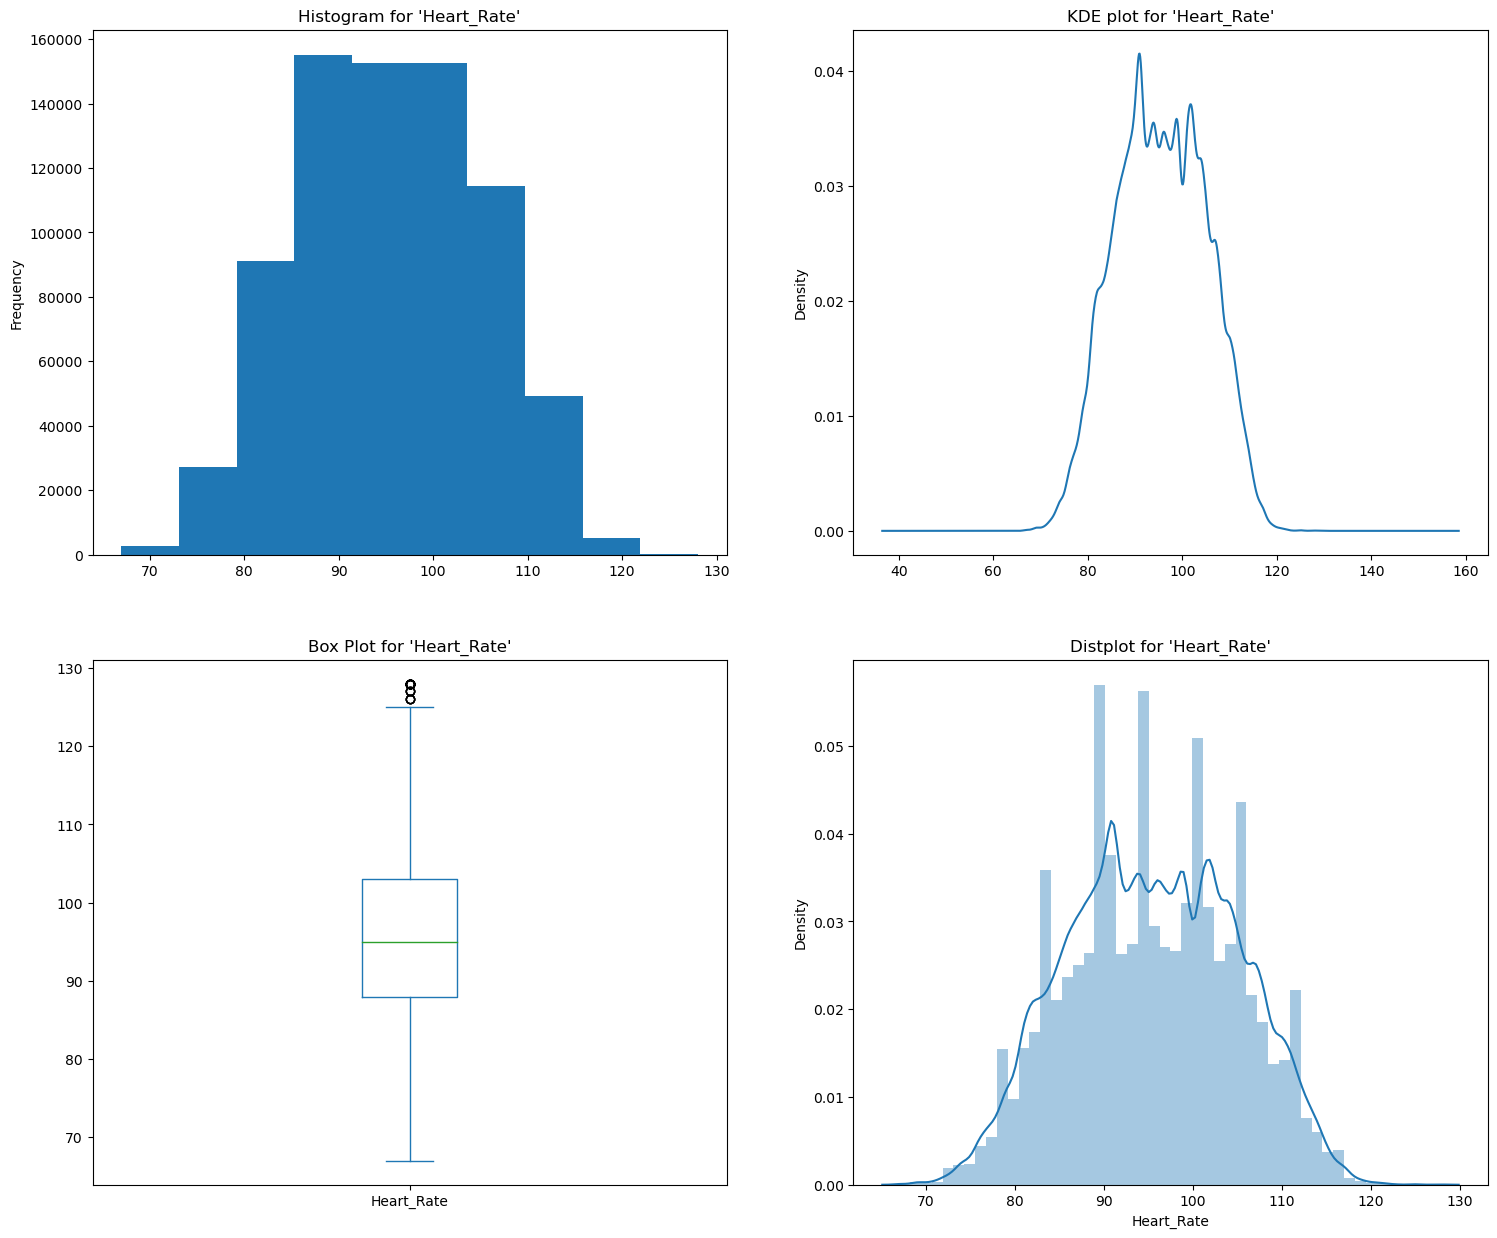

In [44]:
show_details_and_graphs(train_df,'Heart_Rate')

#### Observation;
- There are 175 outliers in 'Heart_Rate' feature.
- Distribution is not Normal.

#### Body_Temp -->

In [45]:
train_df['Body_Temp']

0         41.0
1         39.7
2         39.8
3         40.7
4         40.6
          ... 
749995    40.9
749996    40.5
749997    40.9
749998    40.3
749999    40.6
Name: Body_Temp, Length: 750000, dtype: float64

In [46]:
train_df['Body_Temp'].describe()

count    750000.000000
mean         40.036253
std           0.779875
min          37.100000
25%          39.600000
50%          40.300000
75%          40.700000
max          41.500000
Name: Body_Temp, dtype: float64

In [47]:
check_outlier(train_df,'Body_Temp')

Feature Name : Body_Temp
Based on Z-Score test :



id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
40          40  female   71   178.0    79.0       1.0        76.0       37.6   
105        105    male   41   195.0    93.0       2.0        81.0       37.5   
141        141  female   40   150.0    51.0       1.0        80.0       37.6   
762        762  female   32   161.0    63.0       1.0        81.0       37.5   
834        834    male   45   182.0    85.0       1.0        83.0       37.6   
...        ...     ...  ...     ...     ...       ...         ...        ...   
748902  748902  female   31   161.0    58.0       1.0        84.0       37.6   
749103  749103  female   63   175.0    77.0       1.0        75.0       37.6   
749204  749204  female   25   164.0    61.0       1.0        86.0       37.4   
749653  749653    male   59   197.0   100.0       1.0        83.0       37.5   
749655  749655  female   33   173.0    71.0       1.0        77.0       37.6   

        Calories  
40           4.0  
105          5.0  
141          4.0  
762          4.0  
834          4.0  
...          ...  
748902       4.0  
749103       4.0  
749204       4.0  
749653       4.0  
749655       3.0  

[3368 rows x 9 columns]

Feature: Body_Temp
Data type: float64
Total missing/null values: 0

Mean: 40.04
Median: 40.3
Minimum: 37.1
Maximum: 41.5
Std: 0.78
Skew: -1.0223613156736593


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


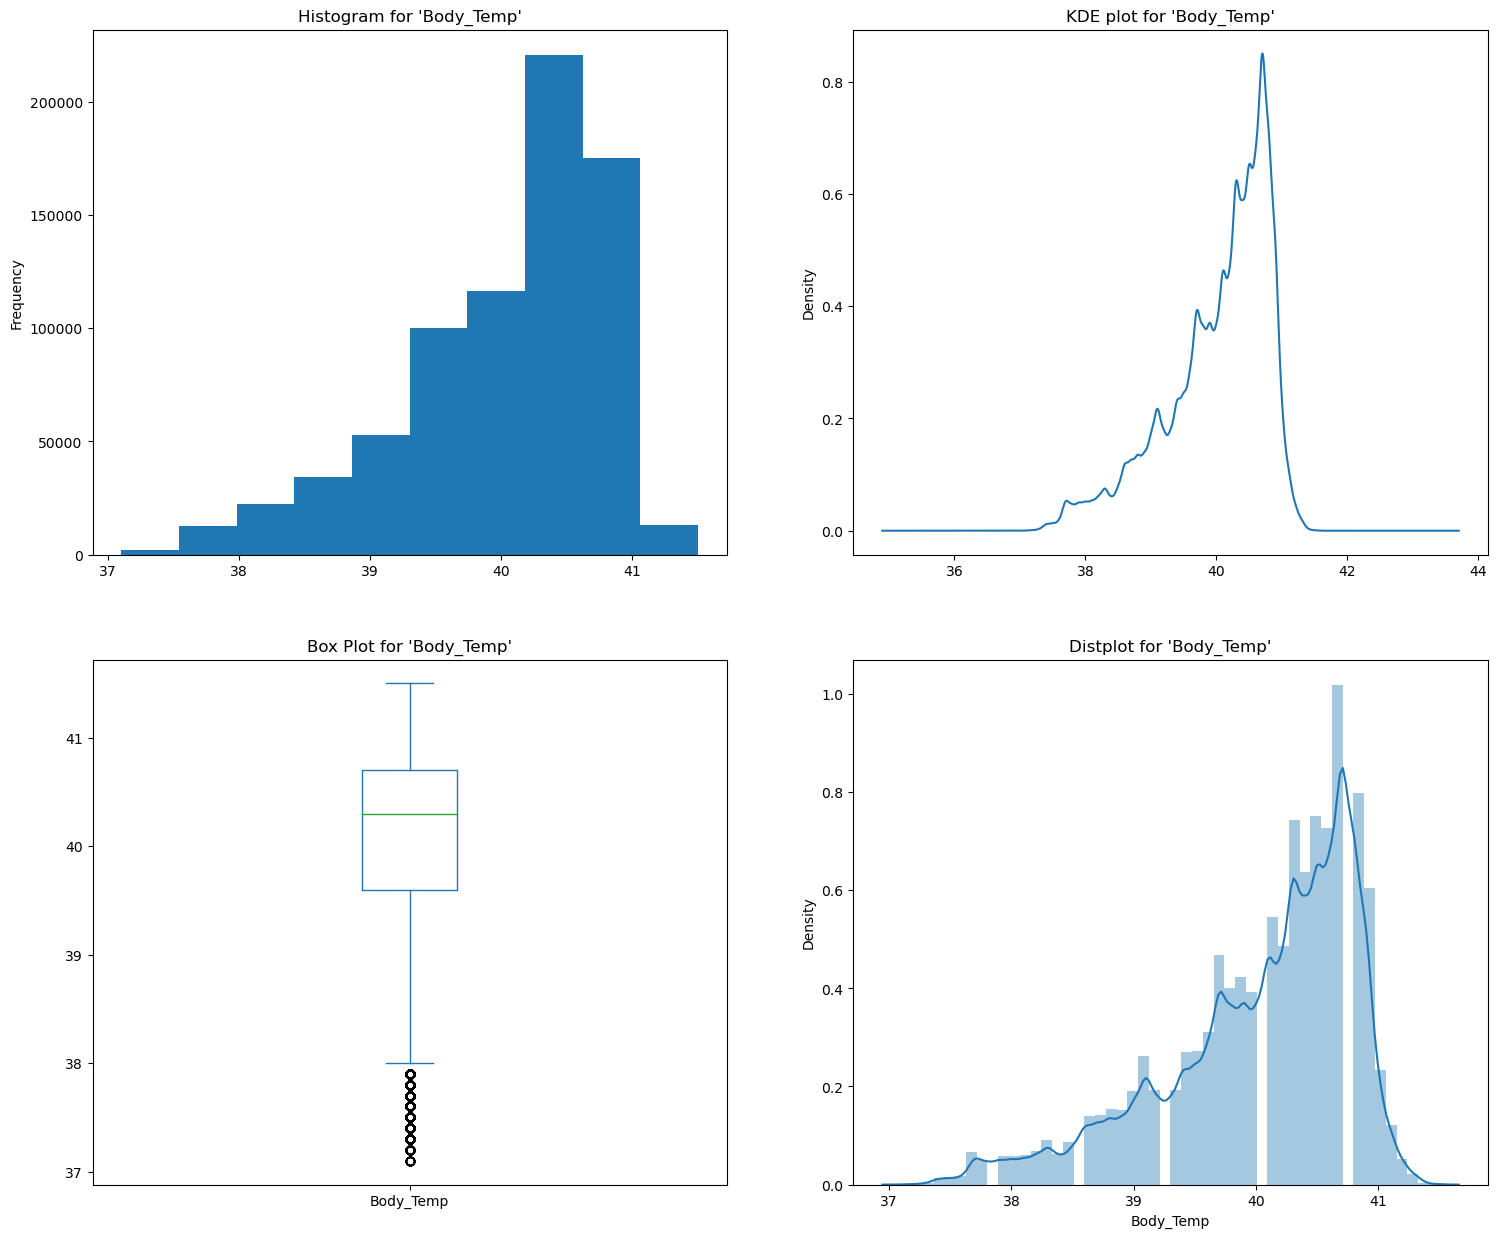

In [48]:
show_details_and_graphs(train_df,'Body_Temp')

#### Observation:
- There are 3368 outliers in 'Body_Temp' according to Z Score method.
- Distribution is highly left skewed.

#### Calories --> (Target Feature)

In [49]:
train_df['Calories']

0         150.0
1          34.0
2          29.0
3         140.0
4         146.0
          ...  
749995    230.0
749996     96.0
749997    221.0
749998    109.0
749999    103.0
Name: Calories, Length: 750000, dtype: float64

In [50]:
train_df['Calories'].describe()

count    750000.000000
mean         88.282781
std          62.395349
min           1.000000
25%          34.000000
50%          77.000000
75%         136.000000
max         314.000000
Name: Calories, dtype: float64

In [51]:
check_outlier(train_df,'Calories')

Feature Name : Calories
Based on Z-Score test :



id   Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
6773      6773  male   77   188.0    92.0      30.0       113.0       40.8   
10378    10378  male   75   180.0    79.0      30.0       120.0       41.2   
10730    10730  male   60   205.0   114.0      30.0       119.0       40.8   
13157    13157  male   72   191.0    96.0      29.0       116.0       40.7   
14209    14209  male   64   185.0    90.0      29.0       127.0       40.9   
...        ...   ...  ...     ...     ...       ...         ...        ...   
732529  732529  male   57   195.0    97.0      29.0       120.0       41.1   
732880  732880  male   57   208.0   113.0      30.0       116.0       41.0   
734983  734983  male   73   174.0    78.0      29.0       123.0       41.0   
739554  739554  male   72   191.0    97.0      28.0       121.0       41.0   
748841  748841  male   76   175.0    80.0      30.0       117.0       41.1   

        Calories  
6773       280.0  
10378      295.0  
10730      295.0  
13157      287.0  
14209      295.0  
...          ...  
732529     314.0  
732880     276.0  
734983     314.0  
739554     287.0  
748841     276.0  

[312 rows x 9 columns]

Feature: Calories
Data type: float64
Total missing/null values: 0

Mean: 88.28
Median: 77.0
Minimum: 1.0
Maximum: 314.0
Std: 62.4
Skew: 0.539196264522959


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


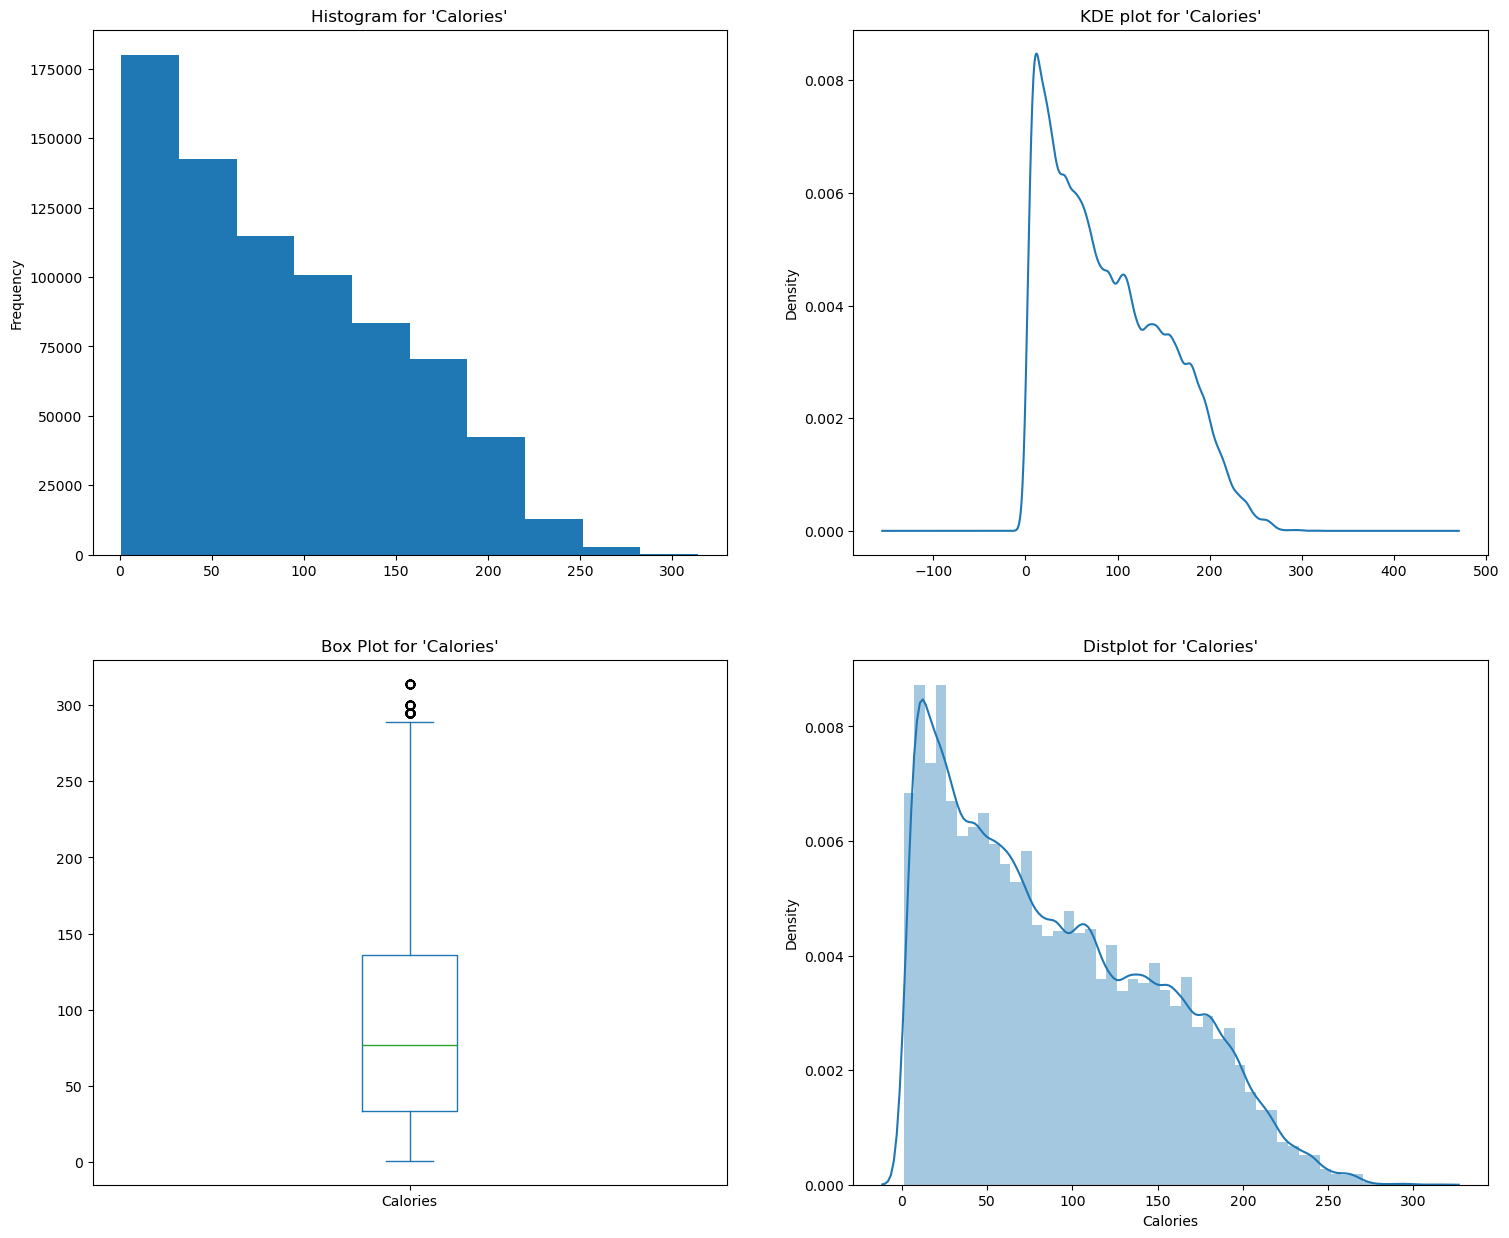

In [52]:
show_details_and_graphs(train_df,'Calories')

### Bivariate Analysis

In [53]:
train_df.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

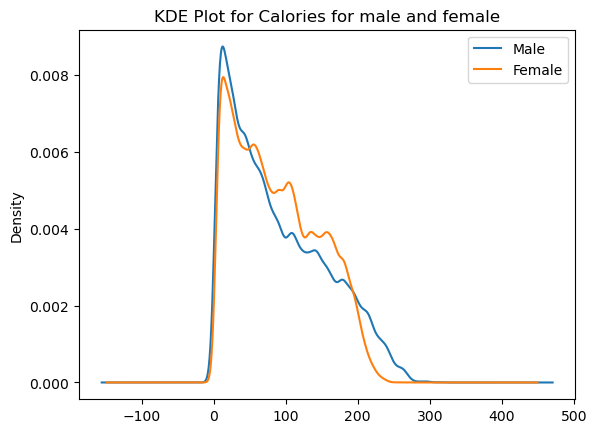

In [54]:
train_df[train_df['Sex']=="male"]['Calories'].plot(kind='kde',label="Male")
train_df[train_df['Sex']=="female"]['Calories'].plot(kind='kde',label="Female")

plt.title("KDE Plot for Calories for male and female")

plt.legend()
plt.show()

#### Numerical and Categorical Features list

In [55]:
num_col_list = [feature for feature in train_df.columns if train_df[feature].dtype!='O']
cat_col_list = [feature for feature in train_df.columns if train_df[feature].dtype=='O']

In [56]:
num_col_list

['id',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp',
 'Calories']

In [57]:
cat_col_list

['Sex']

#### Scatter Plot

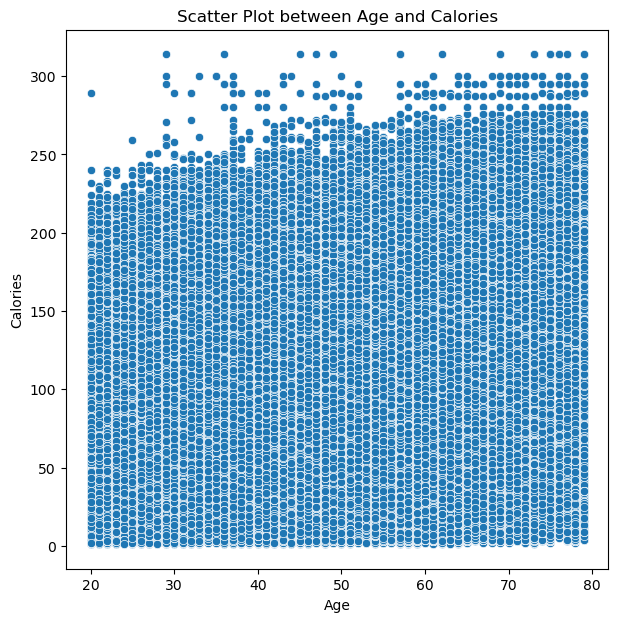

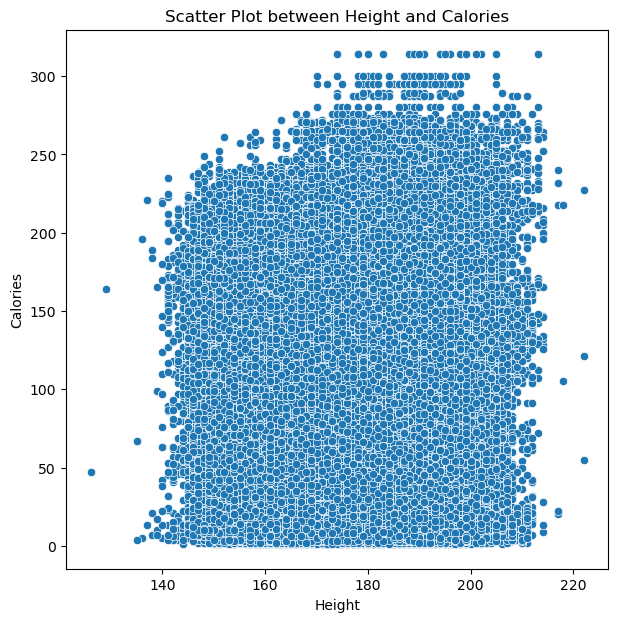

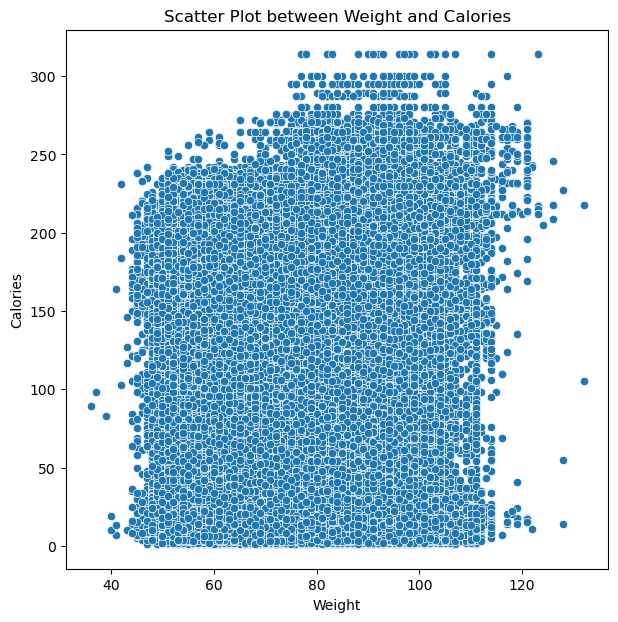

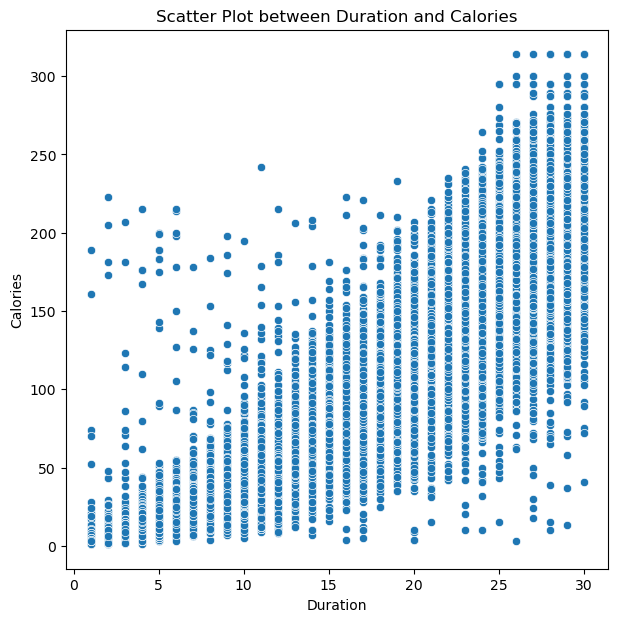

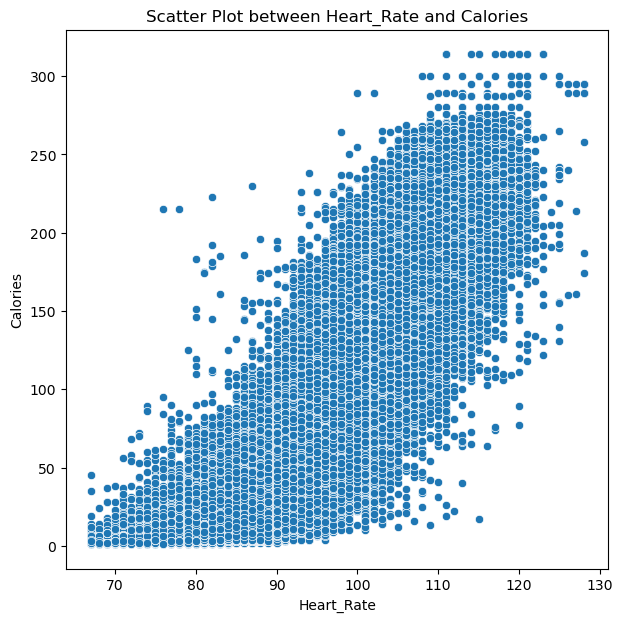

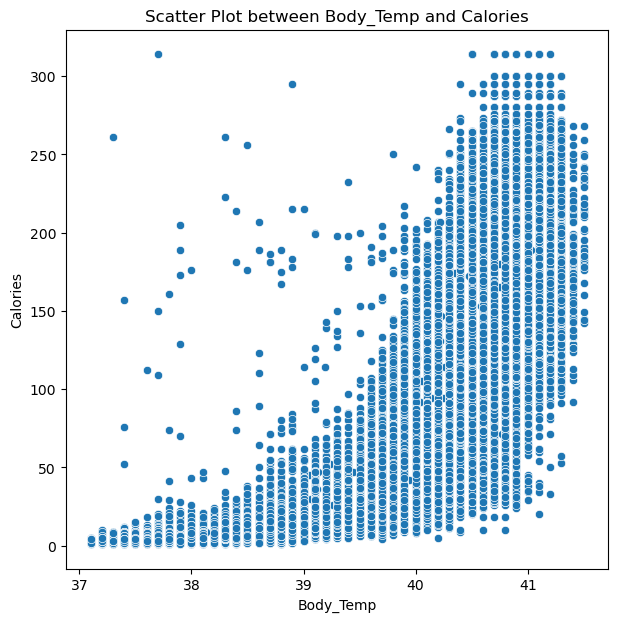

In [58]:
for feature in num_col_list[1:-1]:
    plt.figure(figsize=(7,7))
    sns.scatterplot(data=train_df,x=feature,y='Calories')
    plt.title(f"Scatter Plot between {feature} and Calories")
    plt.xlabel(feature)
    plt.ylabel("Calories")
    plt.show()

<AxesSubplot:xlabel='Age', ylabel='Weight'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


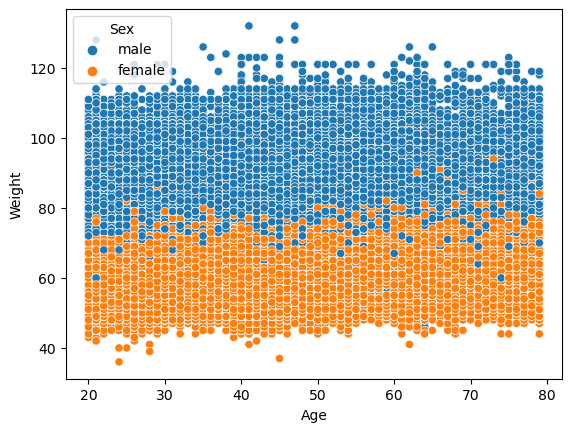

In [59]:
sns.scatterplot(data=train_df,x='Age',y='Weight',hue='Sex')

#### Barplot between Sex and Calories feature

<AxesSubplot:xlabel='Sex', ylabel='Calories'>

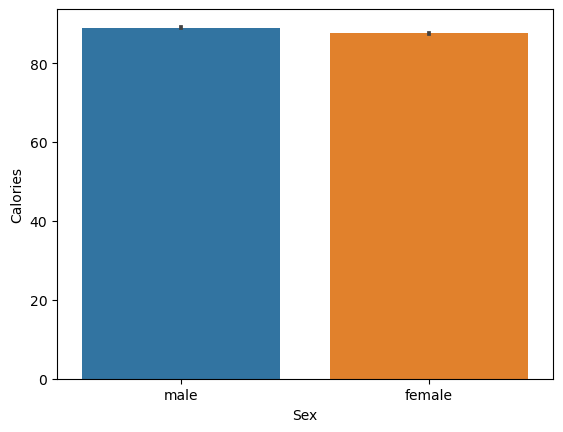

In [60]:
sns.barplot(x=train_df['Sex'],y=train_df['Calories'])

### Heatmap : To check the correlated features

<AxesSubplot:>

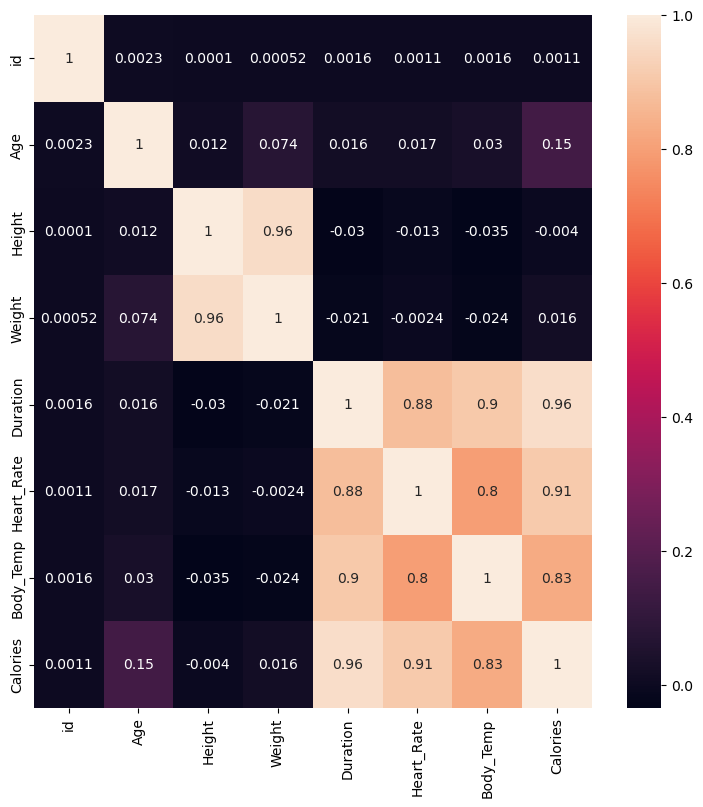

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(train_df[num_col_list].corr(),annot=True)

#### Observation:
- Height and Weight are correlated.
- Body_Temp and Duration are correlated.

### Pairplot 

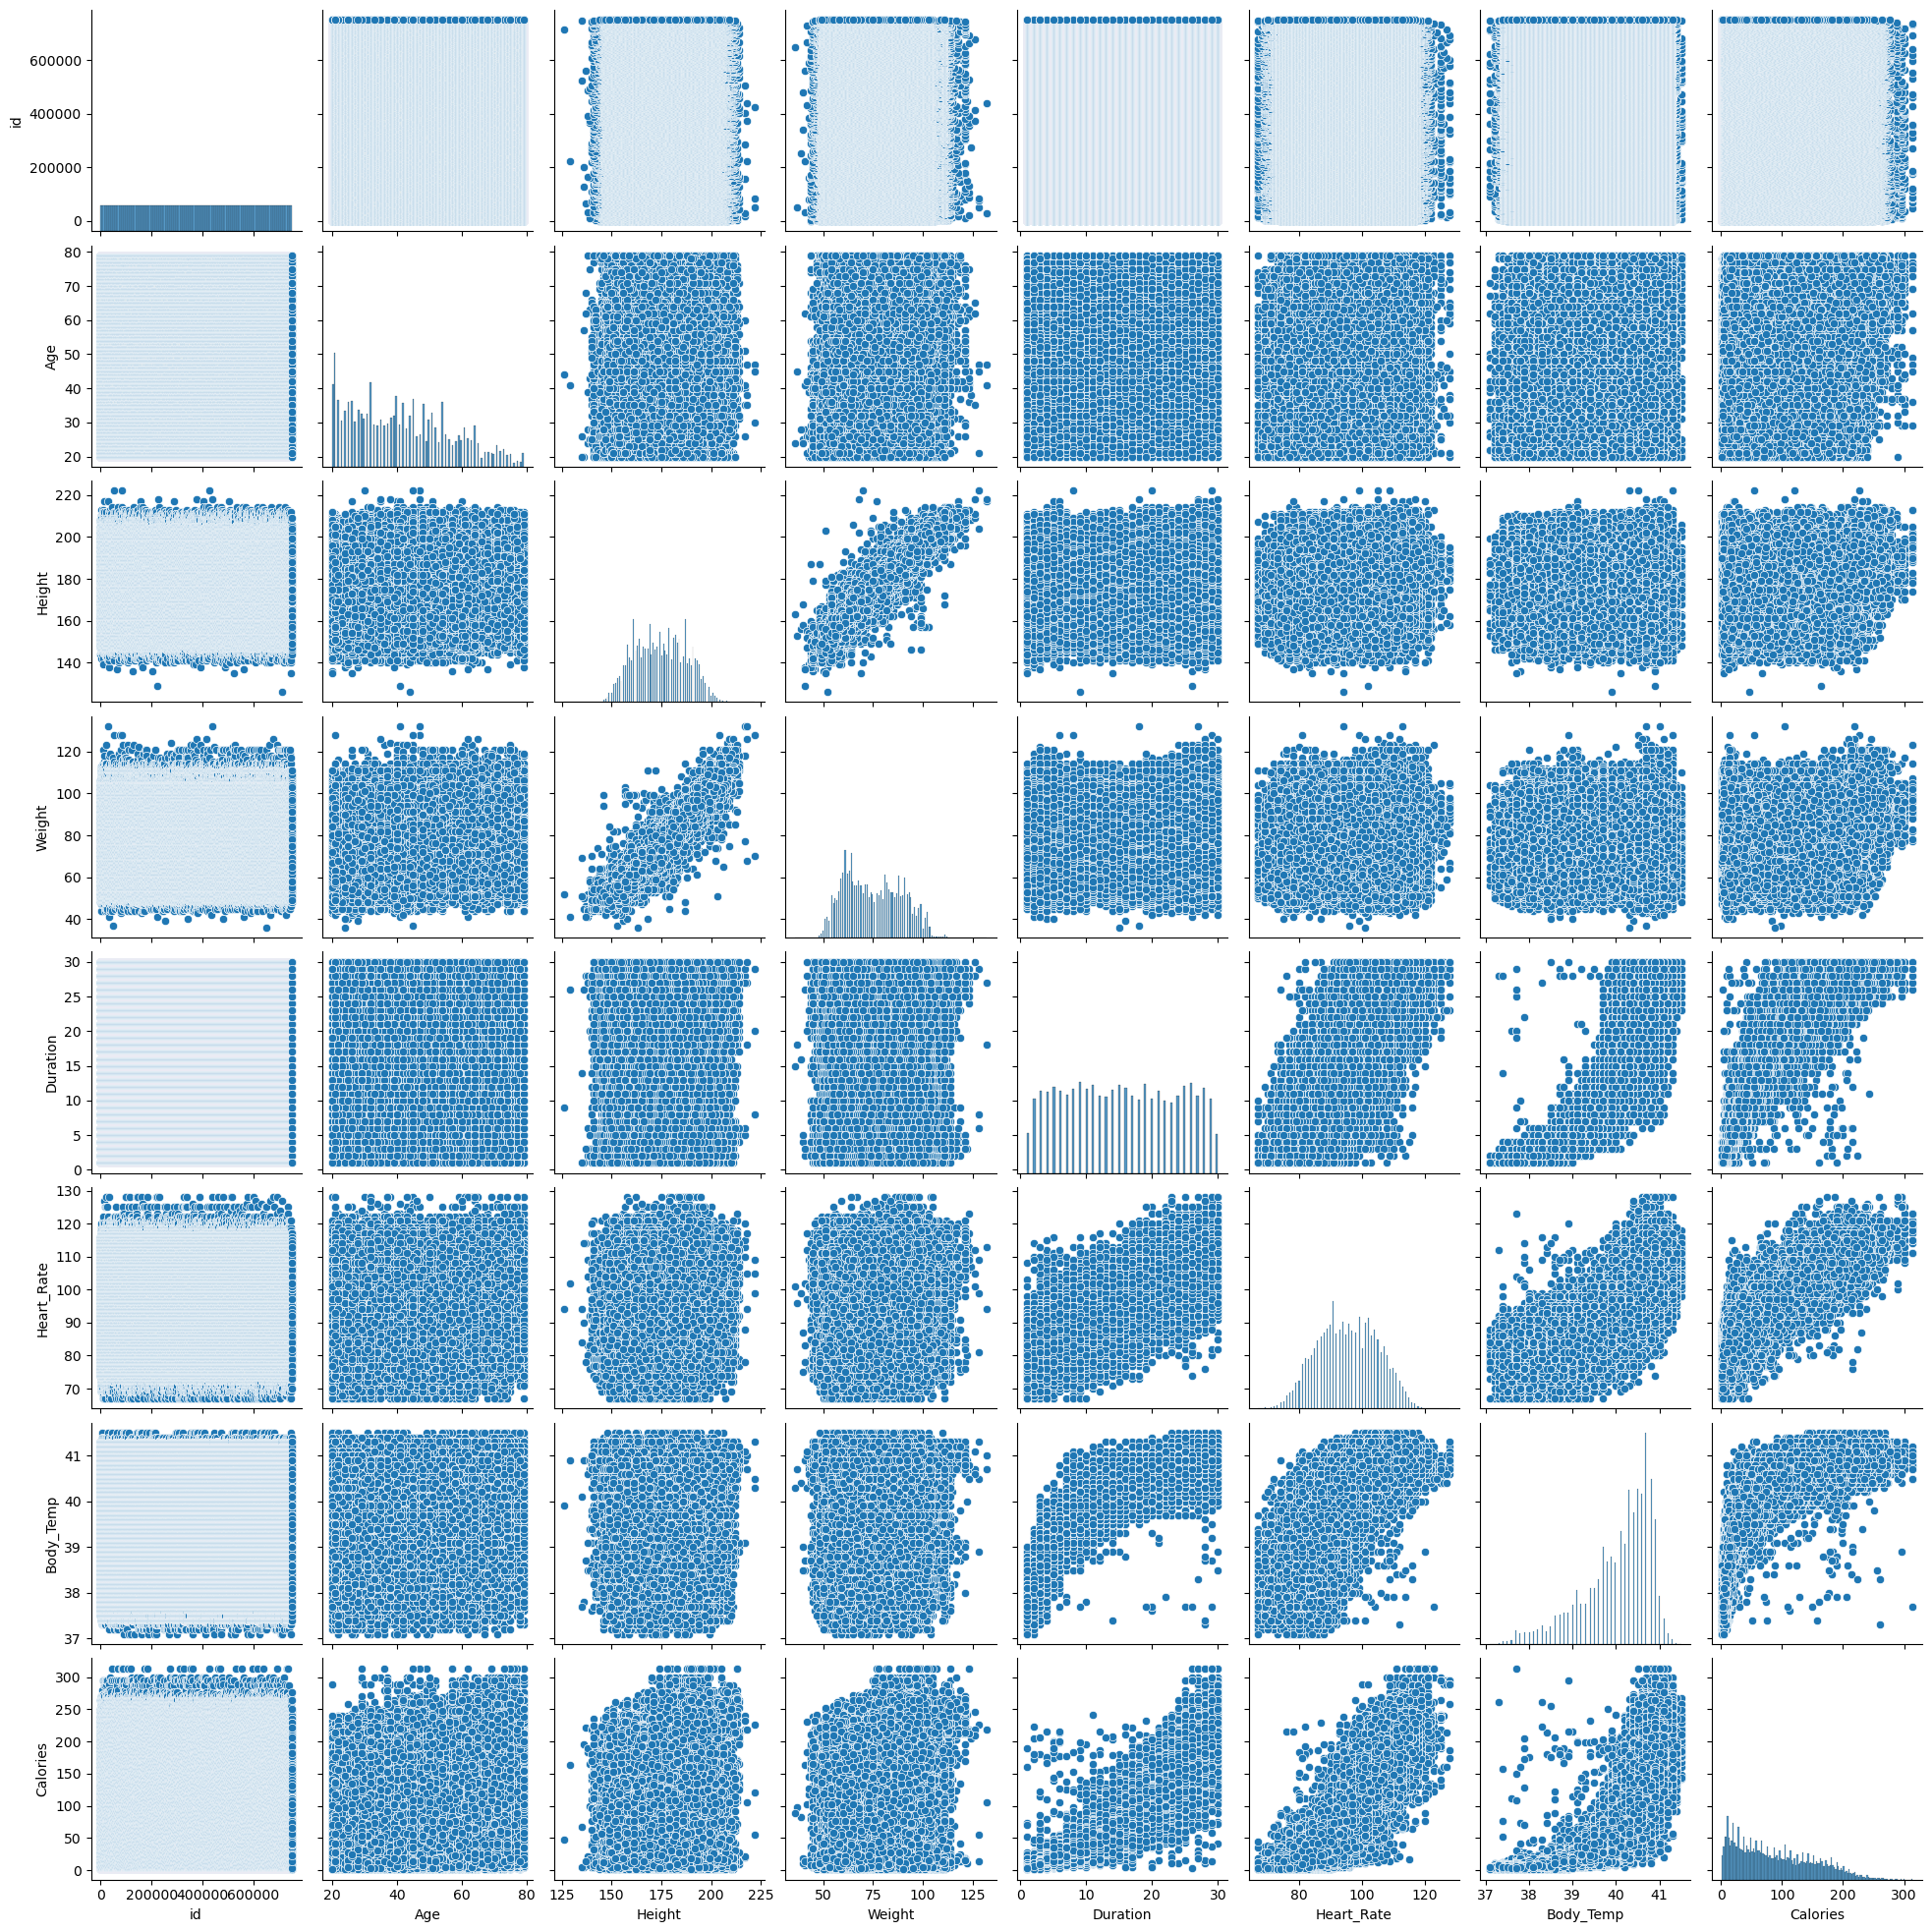

In [62]:
sns.pairplot(train_df)

## Independent and Target Feature

In [63]:
train_df.head()

id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

In [64]:
X = train_df.drop(columns=['id','Calories']) ## Independent features
y = train_df['Calories']

In [65]:
X.head()

Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0    male   36   189.0    82.0      26.0       101.0       41.0
1  female   64   163.0    60.0       8.0        85.0       39.7
2  female   51   161.0    64.0       7.0        84.0       39.8
3    male   20   192.0    90.0      25.0       105.0       40.7
4  female   38   166.0    61.0      25.0       102.0       40.6

In [66]:
y.head()

0    150.0
1     34.0
2     29.0
3    140.0
4    146.0
Name: Calories, dtype: float64

## Train Test Split

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (600000, 7)
Shape of X_test: (150000, 7)


## Feature Engineering (Data Encoding)

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler,OneHotEncoder

## Preprocessor

In [71]:
numerical_features = [feature for feature in X_train.columns if X_train[feature].dtype!='O']
categorical_features = [feature for feature in X_train.columns if X_train[feature].dtype=='O']

In [72]:
categorical_features

['Sex']

In [73]:
numerical_features

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

In [74]:
from sklearn.compose import ColumnTransformer

In [75]:
## preprocessor -->
preprocessor = ColumnTransformer(
    transformers=[
        ("StandardScaler",StandardScaler(),numerical_features),
        ("OneHotEncoder",OneHotEncoder(sparse_output=False,dtype=int,handle_unknown='ignore'),categorical_features)
    ]
,remainder='passthrough')

TypeError: __init__() got an unexpected keyword argument 'sparse_output'

In [ ]:
X_test

In [ ]:
X_test['Sex'].value_counts()

In [ ]:
X_train_trf = preprocessor.fit_transform(X_train)
X_test_trf = preprocessor.transform(X_test)

Doing the same preprocessing on test_df

In [ ]:
## doing same process with test df
test_df.drop(columns=['id'],inplace=True)
test_df_trf = preprocessor.transform(test_df)

**Function to evaluate performance**

In [ ]:
## Model Training and Model Selection
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error

In [ ]:
## Creating a function to evaluat model
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    rmsle = np.sqrt(mean_squared_log_error(true,predicted))
    r2=r2_score(true,predicted)
    print("R2 Score:{:.4f}".format(r2))
    print("MAE:{:.4f}".format(mae))
    print("MSE:{:.4f}".format(mse))
    print("RMSE:{:.4f}".format(rmse))
    print("RMSLE:{:.4f}".format(rmsle))
    
    # ---------
    return 0

In [ ]:
id_column = sample_submission["id"]

## Model Training

In [ ]:
## Model Training and Model Selection

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost 
from xgboost import XGBRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

In [ ]:
X_train

In [ ]:
X_train_trf

In [ ]:
y_train.describe()

In [ ]:
y.describe()

In [ ]:
## Model training
models={
    # "Linear_Regression":LinearRegression(),
    # "Lasso":Lasso(),
    # "Ridge":Ridge(),
    # "ElasticNet":ElasticNet(),
    # "SVR":SVR(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForest":RandomForestRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor(),
    "LGBMRegressor":LGBMRegressor(),
    "CatBoostRegressor":CatBoostRegressor()
}

for i in range(len(list(models))):

    model_name = list(models.keys())[i]
    model=list(models.values())[i]
    model.fit(X_train_trf,y_train) ## Train Model on X_train_trf (encoded)

    ## Make Predictions
    y_train_pred=model.predict(X_train_trf)
    y_train_pred = np.clip(y_train_pred, 1, 314)
    
    y_test_pred=model.predict(X_test_trf)
    y_test_pred = np.clip(y_test_pred, 1, 314)
    
    print(model_name,"=============>")
    print()
    print("Evaluating Train Dataset")
    evaluate_model(y_train,y_train_pred)

    print(f"\n{'-'*50}\n")
    
    print("Evaluating Test Dataset")
    evaluate_model(y_test,y_test_pred)
    print("="*50)
    print("\n")

    ## prediction
    prediction = model.predict(test_df_trf)
    prediction = np.clip(prediction, 1, 314)

    result = pd.DataFrame(
    {
        'id':id_column,
        'Calories':prediction
    }
    )

    result.to_csv('{}_prediction.csv'.format(model_name),index=False)
    print("File saved as '{}_prediction.csv'....".format(model_name))
    print()
